In [1]:
import time
import operator

# https://stackoverflow.com/questions/18761766/mergesort-with-python
def merge(a):
    left, right = a
    result = []
    i, j = 0, 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    while i < len(left):
        result.append(left[i])
        i += 1
    while j < len(right):
        result.append(right[j])
        j += 1
    return result

# https://stackoverflow.com/questions/2130016/splitting-a-list-into-n-parts-of-approximately-equal-length
def split(a, n):
    k, m = divmod(len(a), n)
    return [a[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n)]

def sort(a):
    start = time.time()
    a_srt = sorted(a) # timsort
    end = time.time()
    print(f"N={len(a)}, Elapsed time: {end - start}")
    return a_srt

def pairwise(a):
    it = iter(a)
    return zip(it, it)

In [2]:
# without multiprocess
# https://stackoverflow.com/questions/2631189/python-every-other-element-idiom/2631256#2631256

def mergesort_(L, k=2):
    L_spl = split(L, k)
    L_srt = list(map(sort, L_spl))
    last = None
    if len(L_srt) % 2: # odd
        last = L_srt.pop()

    while len(L_srt) > 1:
        L_prw = pairwise(L_srt)
        L_srt = list(map(merge, L_prw))
    
    L_srt = L_srt[0]
    if last:
        L_srt = merge([L_srt, last])
    return L_srt

print(mergesort_([4,5,6,4,2,1], k=2))
print(mergesort_([4,5,6,4,2,1], k=3))

N=3, Elapsed time: 4.0531158447265625e-06
N=3, Elapsed time: 3.814697265625e-06
[1, 2, 4, 4, 5, 6]
N=2, Elapsed time: 1.9073486328125e-06
N=2, Elapsed time: 1.9073486328125e-06
N=2, Elapsed time: 1.1920928955078125e-06
[1, 2, 4, 4, 5, 6]


In [3]:
from multiprocessing import Pool

def mergesort(L, k=2):
    L_spl = split(L, k)
    with Pool(k) as p:
        L_srt = list(p.map(sort, L_spl))
    last = None
    if len(L_srt) % 2: # odd
        last = L_srt.pop()
        if not L_srt:
            return last

    while len(L_srt) > 1:
        L_prw = pairwise(L_srt)
        with Pool(int(k/2)) as p: # it is necessary?
            L_srt = list(p.map(merge, L_prw))

    L_srt = L_srt[0]
    if last:
        L_srt = merge([L_srt, last])
    return L_srt

mergesort([4,5,6,4,2,1], k=2)

N=3, Elapsed time: 1.0967254638671875e-05
N=3, Elapsed time: 1.239776611328125e-05


[1, 2, 4, 4, 5, 6]

In [7]:
import time
import random


times = []
for N in [1e6, 1e7, 1e8]:
    for k in [1,2,4,8,16]:
        print("########################")
        print(f"Starting k={k},N={N}")
        L = [random.randint(1,10) for _ in range(int(N))]

        start = time.time()
        mergesort(L, k=k)
        end = time.time()
        times.append({'k': k, 'N': N, 't': end - start})
        print()
        print(f"Elapsed time: {end - start}")
        print()

########################
Starting k=1,N=1000000.0
N=1000000, Elapsed time: 0.10695600509643555

Elapsed time: 0.6596934795379639

########################
Starting k=2,N=1000000.0
N=500000, Elapsed time: 0.0749664306640625
N=500000, Elapsed time: 0.0718529224395752

Elapsed time: 1.2702751159667969

########################
Starting k=4,N=1000000.0
N=250000, Elapsed time: 0.04184699058532715
N=250000, Elapsed time: 0.09807634353637695
N=250000, Elapsed time: 0.07970309257507324
N=250000, Elapsed time: 0.08752632141113281

Elapsed time: 2.200981378555298

########################
Starting k=8,N=1000000.0
N=125000, Elapsed time: 0.016080617904663086
N=125000, Elapsed time: 0.0902092456817627
N=125000, Elapsed time: 0.05911755561828613
N=125000, Elapsed time: 0.07106733322143555
N=125000, Elapsed time: 0.05324196815490723
N=125000, Elapsed time: 0.08257865905761719
N=125000, Elapsed time: 0.051610469818115234
N=125000, Elapsed time: 0.07938098907470703

Elapsed time: 3.9277350902557373

#

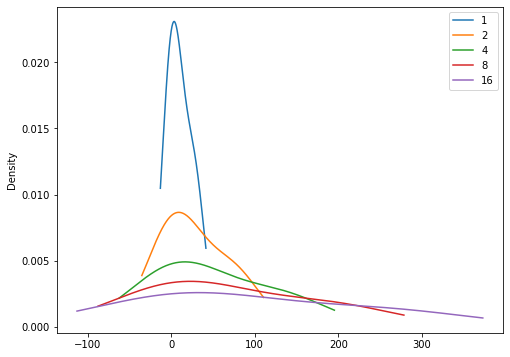

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

p_df = pd.DataFrame(times)
fig, ax = plt.subplots(figsize=(8,6))
for label, df in p_df.groupby('k'):
    df.t.plot(kind="kde", ax=ax, label=label)
plt.legend()

In [80]:
# ask: Multiprocessing vs Threading Python
# https://stackoverflow.com/questions/18114285/what-are-the-differences-between-the-threading-and-multiprocessing-modules